Back to the [README](./README.md)

--------------------

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from setup import df, Col, Palette

--------------------

# Analysis of the `insurance.csv` File

As a quick side note, a first glance and some setup for the analysis
of the data has been made in the [setup notebook](./setup.ipynb).
The code has then been extracted into the local `setup` package for
reuse in all the other notebooks.

The decision for this design has been made due to the size of the
original analysis notebook (the one you are currently reading) kept
increasing and quickly became difficult to keep a clean structure of.

Thus, this notebook will serve as an overview and a navigation tool
linking to various other notebooks each dealing with a specific task,
hypothesis or topic.

Let's have a quick look at our `df` object, shall we?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 64.2+ KB


In [3]:
df.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,1.000000,15.960000,0.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,4740.287150
50%,39.000000,2.000000,30.400000,1.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,63770.428010


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,True,southwest,16884.92400
1,18,2,33.770,1,False,southeast,1725.55230
2,28,2,33.000,3,False,southeast,4449.46200
3,33,2,22.705,0,False,northwest,21984.47061
4,32,2,28.880,0,False,northwest,3866.85520


## Initial Hypotheses

Looking at the information now we can come up with few initial
hypotheses to verify going forward.  All of them will be of the
nature of "Does X correlate to Y?" questions.  Below is a compilation
of those to start off with:

1.  Is there a relation between the age and the insurance charges?
    - Given that the overall health declines with growing age, one would
      expect to see higher costs for older people.
2.  Do males and females get charged evenly by their insurance companies?
    - Given the fact that medical treatment for both sexes varies significantly,
      one would expect females to be charged more on average.
3.  Is there a relation between the BMI and the insurance charges?
    - The BMI can indicate the overall physical health and nutrition quality
      and is affected by many different factors.  One could, however, expect
      that a BMI outside of the respective accepted healthy range for males
      and females would indicate a lower health level and thus cause higher
      insurance charges.
4.  Does the number of children affect the insurance charges?
    - Having children can have many effects: some people become less
      susceptible to taking risks, they improve their own lifestyle to
      be an example for and take care of their children. On the other hand
      side, tending to children can cause additional stress or warrant
      risks in and of itself.
5.  Is there a relation between the smoking habits and the insurance charges?
    - Smoking is known to worsen one's health in general, so one would
      expect to see higher charges for smokers.
6.  Is there a relation between the region and the insurance charges?
    - This would indicate that there might be regional risk factors
      the insurance companies would need to account for.
7.  Is there a preferred region for younger or older people.
    - This could correlate to, for instance, job availability, education
      and general working conditions.
8.  Is there a relation between the BMI and the region?
    - This could indicate differences in lifestyles and qualities of life,
      nutrition and social interaction.
9.  Is there a relation between the number of children and the region?
    - This could indicate that there might be a preferred region for
      family life.
10. Is there a relation between the region and the smoking habits?
    - This could, again, hint towards correlations between the
      respective regions and the local lifestyle, quality of life,
      overall stress, presence and availability of tobacco and so on.
11. Is there a tendency for one sex towards developing smoking habits
  more so than the other?
    - Developing smoking habits is the result of many different factors.
      While there might be a tendency to one's sex at some point, it will
      probably not be of major influence.
12. Do smoking habits affect the BMI?
    - Since both are tightly related to one's health, one might expect to
      see a connection here.
13. How does the age play into smoking habits?
    - Knowing that the consumption of tobacco creates an addiction, one
      might expect to see a that older people tend to smoke more than younger
      ones; once having developed the addiction, it's less likely to get
      rid of it again.
14. Does the number of children affect the smoking habits?
    - Assuming that smoking ties into the overall perceived stress level,
      having to tend to children might increase the chance for that.
15. Does the number of children affect the BMI?
    - Again, this ties into the question asked earlier relating family
      life to one's overall health (question 4).
16. Is there a relation between the age and the number of children?
    - Assuming that having children at all indicates the decision to
      settle down and having achieved some sort of goals in life, there
      might be a hint towards children coming into one's life at a later
      stage.  On the other hand side, factors like religion, social status
      and wealth and others could encourage having children at a younger
      age as well.
17. Is there a relation between the sex and the number of children?
    - A difference could indicate variations in the predominant family (or
      relationship) model, or could be caused by mortalities not tracked in
      the dataset.
18. Is there a relation between the age and the BMI?
    - This is to be expected to be true when taking children into account
      as well.  But the records of the dataset start at age 18, meaning
      we're missing a crucial set of information to come to a conclusion here.
19. Is there a relation between the sex and the BMI?
    - This is known to be true, and thus we shall expect to find evidence in
      the dataset as well.

Although this looks like a vast range of questions so far, up until this point
we're checking just two-dimensional aspects of the dataset.  Since health in
general is such a complex topic in and of itself, trying to consider only
isolated factors without allowing them to interact with each other will yield
limited, incomplete or even wrong results.

We will come to more complex analysis later, after we dealt with those initial
questions.  One can already assume, though, that the dataset is far too small
to answer all of them anywhere near satisfyingly; we only have 1338 records to go
with, which are likely to be too few to illustrate four-dimensional correlations.
We can consider ourselves lucky if we find three-dimensional ones at that point.

For an initial taste of what's to come, we could use `seaborn`'s `pairplot()`
to glimpse over the purely numeric data we have already available:

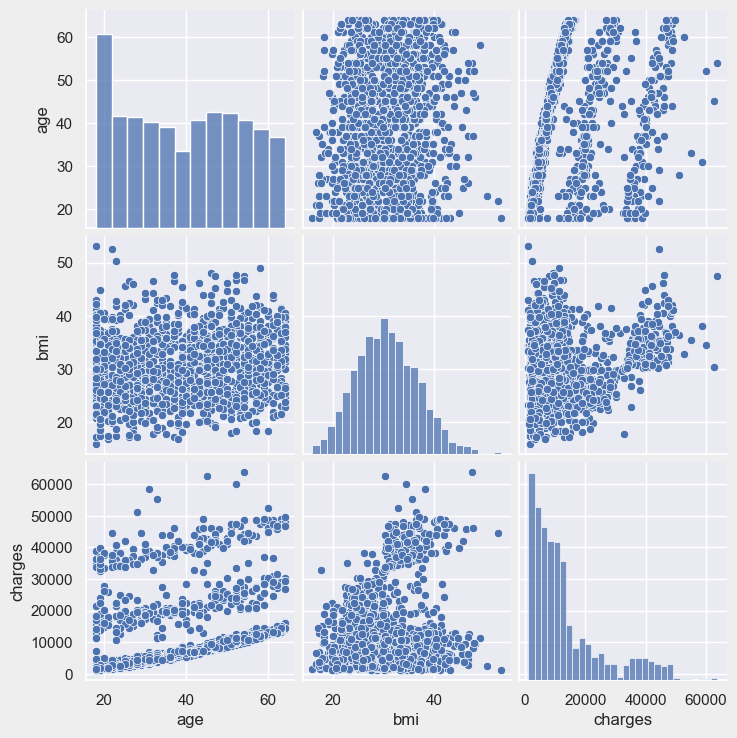

In [5]:
sns.pairplot(data=df[[Col.age, Col.bmi, Col.charges]])
plt.show()

By looking just at this graphic, we can immediately derive some expectations for our hypotheses.

For instance, we will not only find a relation between the age and the insurance charges, but
we will might also find some deeper correlations with other features of the dataset or even a
formula that could give an estimate for the insurance charges.

As for the relation between the age and the BMI, we see the assumption confirmed that there
is no evidence for a connection to be found here.  A deeper look with respect to other data will
probably yield no further revelation.

And considering a connection between the charges and the BMI, there seems to be some sort of
clustering going on.  But it is hard to detect any details just yet.

With `sex`, `children`, `smoker` as `region` categorical features, we can try to look a bit
deeper into those relations with a line of code very similar to the one above:

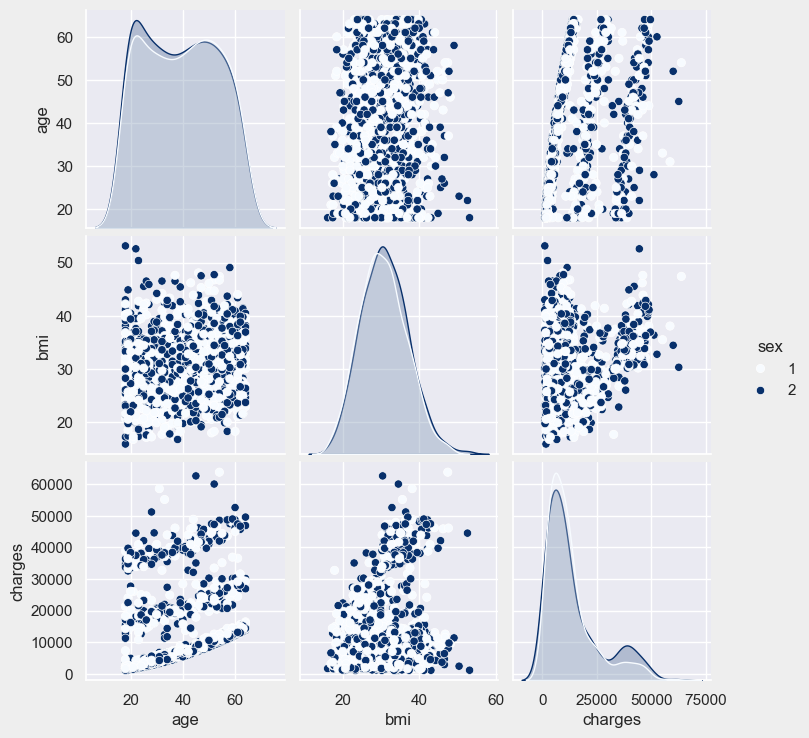

In [6]:
sns.pairplot(data=df[[Col.sex, Col.age, Col.bmi, Col.charges]], hue=Col.sex, palette=Palette.bl)
plt.show()

In the graphic above, the bright colors (sex `1`) represents female data while the dark spots (sex `2`)
represents male data.

Regarding the assumption that the sex would have an impact on the charges, this does seem to be true
as one can easily guess by looking at the lower right graph.  There is a quite a difference in the
overlap between both groups.  But we will look into this in some more detail later.

Something similar can be said about the BMI, as the central graph indicates.  We are on a good track here.
Again, we will discuss this deeper in the respective notebook.

Surprisingly, if one accepts those visual differences between  both sexes as fact, then our dataset
seems to consistently contain less females under the age of around 45 than males.  And this behavior seems
to invert beyond that age.  Looking back at our inspection of the dataset, the descriptive statistics,
we see that both sexes are about evenly represented.  That means, we can assume the average age of females
in this dataset to be greater than the males, as the following code line confirms:

In [7]:
df.groupby(Col.sex).age.mean()

sex
1    39.503021
2    38.917160
Name: age, dtype: float64

Moving on, we look at the impact of children on the same data:

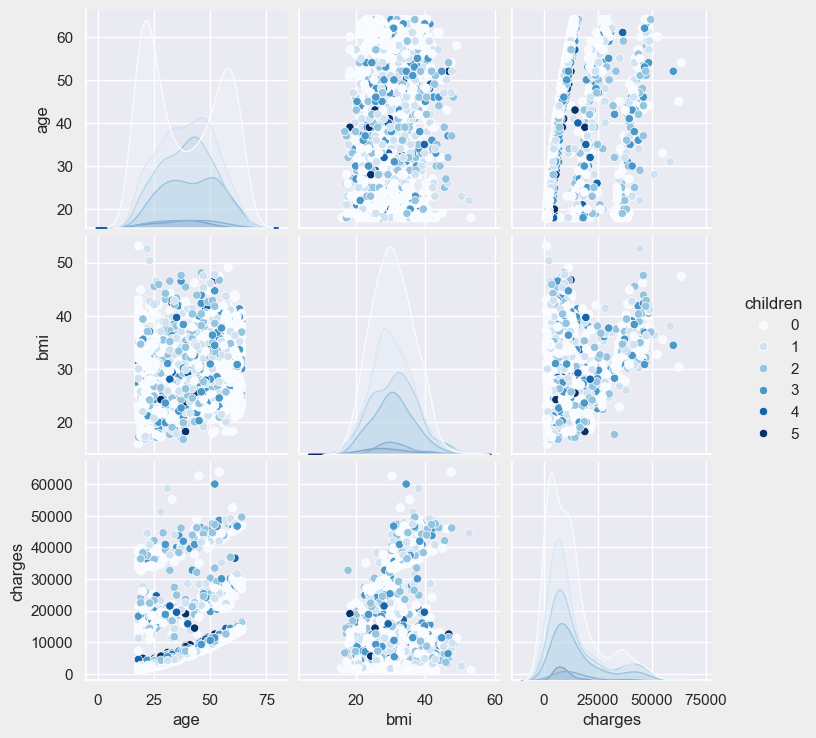

In [8]:
sns.pairplot(data=df[[Col.children, Col.age, Col.bmi, Col.charges]], hue=Col.children, palette=Palette.bl)
plt.show()

There is a lot to derive from this overview already!

First, looking at the top left graph, we can see that childless individuals concentrate
on both ends of the covered age spectrum (around the 20s and the 60s).  The individuals
that are reported to have at least one child seem to be located roughly within those
boundaries.  On top of that, about the same amount of people between (again, roughly) 35
and 45 years of age seem to have no child, or one or two children.
Individuals with three children are represented in the dataset by a significant amount as
well, but as soon as a child count of four or higher is encountered, the numbers shrink
substantially.  Thus, for further analysis, we could put them into one category with the
former in order to keep their information, but not unnecessarily put focus on them in
particular.

The next observation ties into the first one as well:  while there still is no obvious
corelation between the age and the BMI, the age distribution for the childless individuals
is reflected in their densities in the age-BMI diagrams, as they dominate the aforementioned
outer age ranges.

As for the age-related charges, it's clear to see that individuals without children
are present on all three levels, but they make the lower spectrum of each.  It is noticeable,
though, that the most expensive cases are connected to childless individuals.

Next, one could spot some more structure in the graphs illustrating the relation between
the insurance charges and the BMI.  It is not clear to see (yet), but there could be some
linearities between them.

And finally, looking at the lower right graph, by observing that the brighter lines
(correlating to none or few children) expose a more dynamic curve (a notable second bump
for higher charges), could hint that there is also a relation to be found there.  In order
to observe that deeper, however, one would need to look at the relative distribution since
childless individuals way outnumber any of the ones with children. 

Alright let us move on with a look at the effect of smoking on the data:

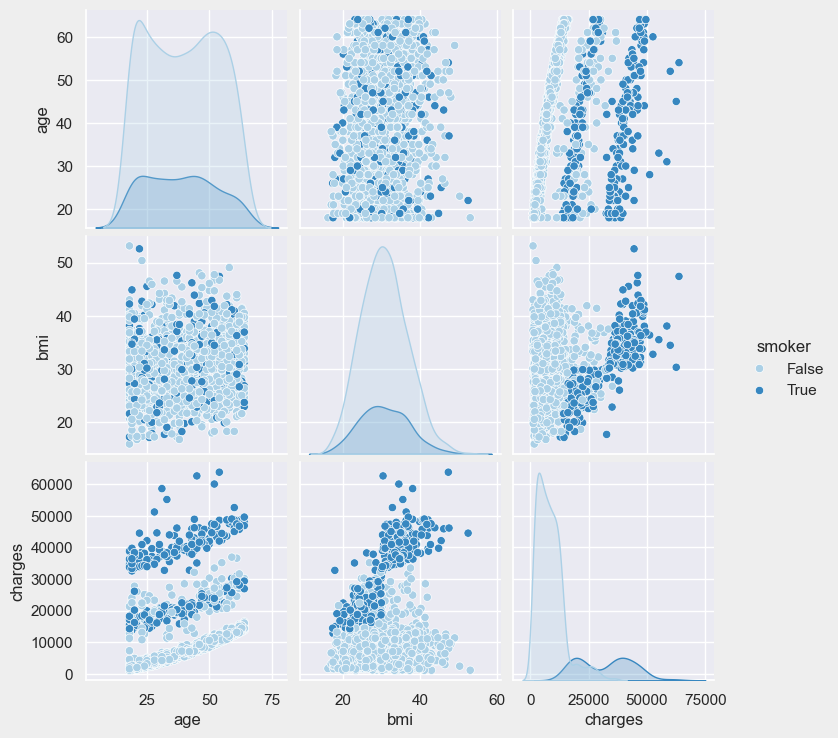

In [9]:
sns.pairplot(data=df[[Col.smoker, Col.age, Col.bmi, Col.charges]], hue=Col.smoker, palette=Palette.bl)
plt.show()

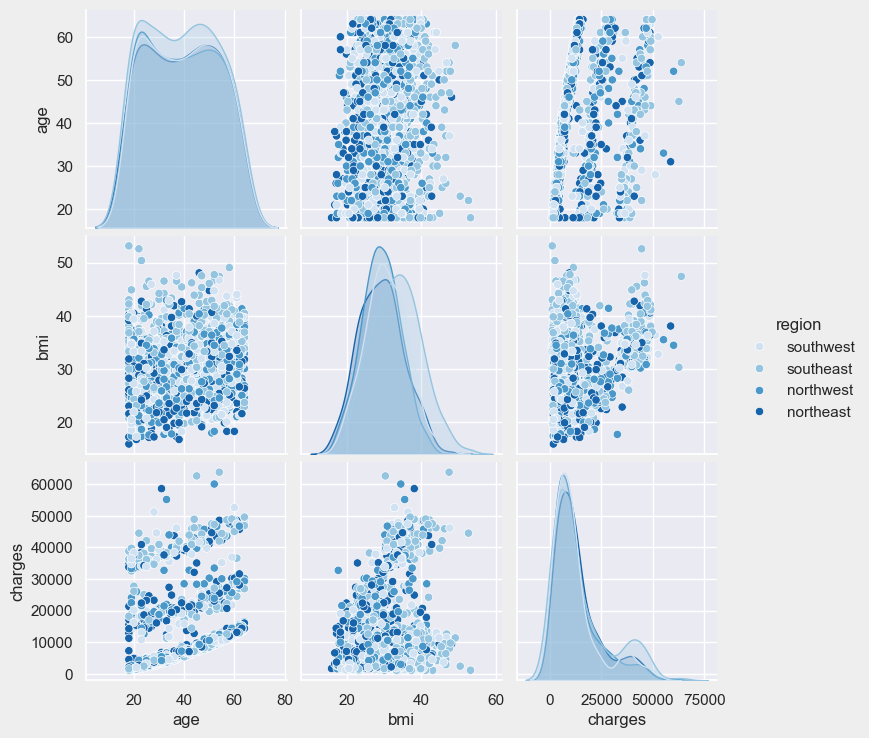

In [10]:
sns.pairplot(data=df[[Col.region, Col.age, Col.bmi, Col.charges]], hue=Col.region, palette=Palette.bl)
plt.show()

### Question 1:<br/>Is there a relation between the age and the insurance charges?

This question has been analyzed in detail in [this](./age-charge-relation.ipynb) notebook.

As stated earlier, one would expect to find that there is, indeed, a correlation such that
higher age, naturally coming with more or more difficult health issues, is accompanied by
higher insurance charges.

And this behavior can already be seen by simply plotting the data as is:

![plot of charges against ages](./images/charge-age-relation-plain.png)

### Question 2:<br/>Do males and females get charged evenly by their insurance companies?

Given the fact that medical treatment for both sexes varies significantly,
one would expect females to be charged more on average.

### Question 3:<br/>Is there a relation between the BMI and the insurance charges?

The BMI can indicate the overall physical health and nutrition quality
and is affected by many different factors.  One could, however, expect
that a BMI outside of the respective accepted healthy range for males
and females would indicate a lower health level and thus cause higher
insurance charges.

### Question 4:<br/>Does the number of children affect the insurance charges?

Having children can have many effects: some people become less
susceptible to taking risks, they improve their own lifestyle to
be an example for and take care of their children. On the other hand
side, tending to children can cause additional stress or warrant
risks in and of itself.

### Question 5:<br/>Is there a relation between the smoking habits and the insurance charges?

Smoking is known to worsen one's health in general, so one would
expect to see higher charges for smokers.

### Question 6:<br/>Is there a relation between the region and the insurance charges?

This would indicate that there might be regional risk factors
the insurance companies would need to account for.

### Question 7:<br/>Is there a preferred region for younger or older people.

This could correlate to, for instance, job availability, education
and general working conditions.

### Question 8:<br/>Is there a relation between the BMI and the region?

This could indicate differences in lifestyles and qualities of life,
nutrition and social interaction.

### Question 9:<br/>Is there a relation between the number of children and the region?

This could indicate that there might be a preferred region for
family life.

### Question 10:<br/>Is there a relation between the region and the smoking habits?

This could, again, hint towards correlations between the
respective regions and the local lifestyle, quality of life,
overall stress, presence and availability of tobacco and so on.

### Question 11:<br/>Is there a tendency for one sex towards developing smoking habits

Developing smoking habits is the result of many different factors.
While there might be a tendency to one's sex at some point, it will
probably not be of major influence.

### Question 12:<br/>Do smoking habits affect the BMI?

Since both are tightly related to one's health, one might expect to
see a connection here.

### Question 13:<br/>How does the age play into smoking habits?

Knowing that the consumption of tobacco creates an addiction, one
might expect to see a that older people tend to smoke more than younger
ones; once having developed the addiction, it's less likely to get
rid of it again.

### Question 14:<br/>Does the number of children affect the smoking habits?

Assuming that smoking ties into the overall perceived stress level,
having to tend to children might increase the chance for that.

### Question 15:<br/>Does the number of children affect the BMI?

Again, this ties into the question asked earlier relating family
life to one's overall health (question 4).

### Question 16:<br/>Is there a relation between the age and the number of children?

Assuming that having children at all indicates the decision to
settle down and having achieved some sort of goals in life, there
might be a hint towards children coming into one's life at a later
stage.  On the other hand side, factors like religion, social status
and wealth and others could encourage having children at a younger
age as well.

### Question 17:<br/>Is there a relation between the sex and the number of children?

A difference could indicate variations in the predominant family (or
relationship) model, or could be caused by mortalities not tracked in
the dataset.

### Question 18:<br/>Is there a relation between the age and the BMI?

This is to be expected to be true when taking children into account
as well.  But the records of the dataset start at age 18, meaning
we're missing a crucial set of information to come to a conclusion here.


### Question 19:<br/>Is there a relation between the sex and the BMI?

This is known to be true, and thus we shall expect to find evidence in
the dataset as well.

--------------------

Following are the derived hypotheses/ questions that arose from analyzing the data
step by step.

--------------------

### Question 20:<br/>Are the elevated charge levels related to one or more properties or attributes of the dataset?  If so, which are those attributes?